# Exercise 1
## Rotation in $\mathbb R^2$

In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

<IPython.core.display.Javascript object>


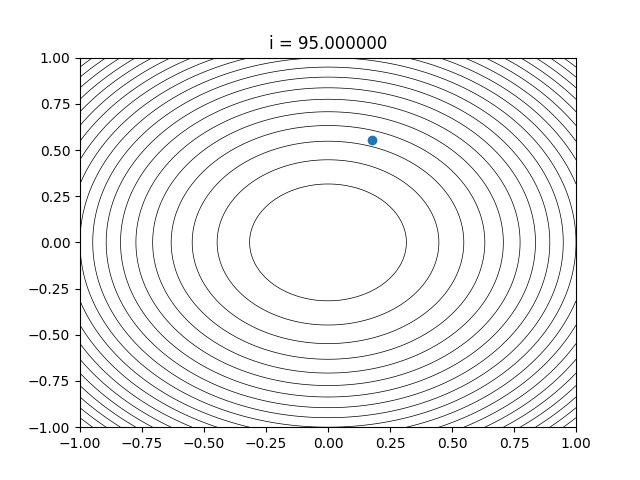

Störmer-Verlet (Leapfrog)


In [2]:
x0 = 0.3
y0 = 0.5

steps = 100
dt = 0.025

x = x0
y = y0

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))
line, = ax.plot([], [], 'o')

x_vec = np.linspace(-1, 1, 100)
y_vec = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vec, y_vec)
H = X**2 + Y**2

C1 = ax.contour(X, Y, H, 20, colors='black', linewidths=0.5)

# initialization function: plot the background of each frame
def init():
    line.set_data(x, y)
    return line,

if False:
    
    print('Explicit Euler')
    
    def animate(i):
        global x, y, dt
        x_new = x + dt*y
        y += - dt*x
        x = x_new
        line.set_data(x, y)
        ax.set(title='i = {:3f}'.format(i))
        return line,
    
elif False:
        
    print('Implicit Euler')
    mat = np.array([[1, -dt], [dt, 1]])
    print(mat)
    imat = np.linalg.inv(mat)
    print(inv_mat)
    
    def animate(i):
        global x, y, dt
        x, y = inv_mat.dot([x, y])
        line.set_data(x, y)
        ax.set(title='i = {:3f}'.format(i))
        return line,
    
elif False:
    
    print('Symplectic Euler')
    mat = np.array([[1, -dt], [0, 1]])
    print(mat)
    imat = np.linalg.inv(mat)
    print(inv_mat)
    
    def animate(i):
        global x, y, dt
        x, y = inv_mat.dot([x, y - dt*x])
        line.set_data(x, y)
        ax.set(title='i = {:3f}'.format(i))
        return line,
    
else:
    
    print('Störmer-Verlet (Leapfrog)')
    def animate(i):
        global x, y, dt
        x += dt/2*y
        y += - dt*x
        x += dt/2*y
        line.set_data(x, y)
        ax.set(title='i = {:3f}'.format(i))
        return line,
    

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', writer = 'avconv', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()